# Data Schema  

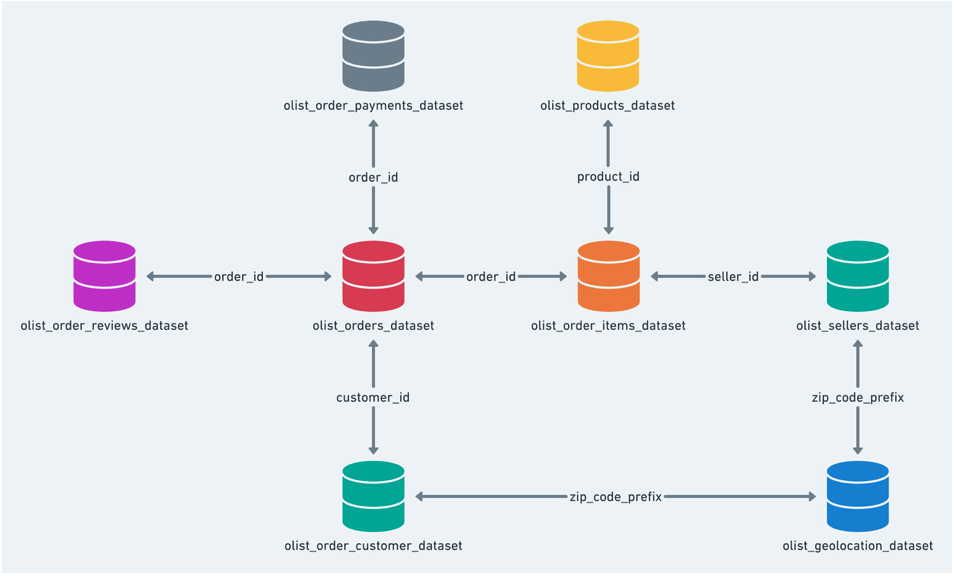  

In [7]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 3

sys.path.append("/Users/skronski/Documents/Projects/e_commerce/00_programs")

In [8]:
from directories import directories_path_setup
from directories import update_gitignore
from directories import reading_files

In [9]:
directories = directories_path_setup(
    "e_commerce", "/Users/skronski/Documents/Projects/"
)
print(directories)

The /Users/skronski/Documents/Projects/e_commerce/00_programs exists already.
The /Users/skronski/Documents/Projects/e_commerce/01_input exists already.
The /Users/skronski/Documents/Projects/e_commerce/02_output exists already.
The /Users/skronski/Documents/Projects/e_commerce/03_temporary exists already.
{'00_programs': '/Users/skronski/Documents/Projects/e_commerce/00_programs', '01_input': '/Users/skronski/Documents/Projects/e_commerce/01_input', '02_output': '/Users/skronski/Documents/Projects/e_commerce/02_output', '03_temporary': '/Users/skronski/Documents/Projects/e_commerce/03_temporary'}


In [10]:
# update_gitignore(directories, "e_commerce", "/Users/skronski/Documents/Projects/")

In [11]:
files_dict = reading_files(directories)
print(files_dict.keys())

['/Users/skronski/Documents/Projects/e_commerce/01_input/olist_sellers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/product_category_name_translation.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_orders_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_items_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_customers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_geolocation_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_payments_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_reviews_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_products_dataset.csv']
dict_keys(['olist_sellers_dataset', 'product_category_name_translation', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_customers_dataset', 'olist_geolocation_dataset', 'olist_order_payments_data

In [12]:
olist_sellers_dataset = files_dict["olist_sellers_dataset"]
product_category_name_translation = files_dict["product_category_name_translation"]
olist_orders_dataset = files_dict["olist_orders_dataset"]
olist_order_items_dataset = files_dict["olist_order_items_dataset"]
olist_customers_dataset = files_dict["olist_customers_dataset"]
olist_order_payments_dataset = files_dict["olist_order_payments_dataset"]
olist_order_reviews_dataset = files_dict["olist_order_reviews_dataset"]
olist_products_dataset = files_dict["olist_products_dataset"]
olist_geolocation_dataset = files_dict["olist_geolocation_dataset"]

In [13]:
olist_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
...,...,...,...,...,...
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [14]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
...,...,...,...,...,...,...,...,...
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [15]:
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
...,...,...,...,...,...
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [16]:
olist_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
...,...,...,...,...,...
1000162,99950,-28.070104,-52.018658,tapejara,RS


# Which City is making the most money?

In [17]:
olist_orders_payment = olist_orders_dataset.loc[:, ["order_id", "customer_id"]].merge(
    olist_order_payments_dataset.loc[:, ["order_id", "payment_value"]],
    on="order_id",
    how="left",
)

In [18]:
olist_payments_city = olist_orders_payment.merge(
    olist_customers_dataset.loc[
        :, ["customer_id", "customer_city", "customer_zip_code_prefix"]
    ],
    on="customer_id",
    how="left",
)

In [19]:
df = olist_payments_city.groupby("customer_city", as_index=False).agg(
    avg_payment=("payment_value", "mean"),
    sum_payment=("payment_value", "sum"),
    median_payment=("payment_value", "median"),
    max_payment=("payment_value", "max"),
    min_payment=("payment_value", "min"),
)

- taking only 20 cities 

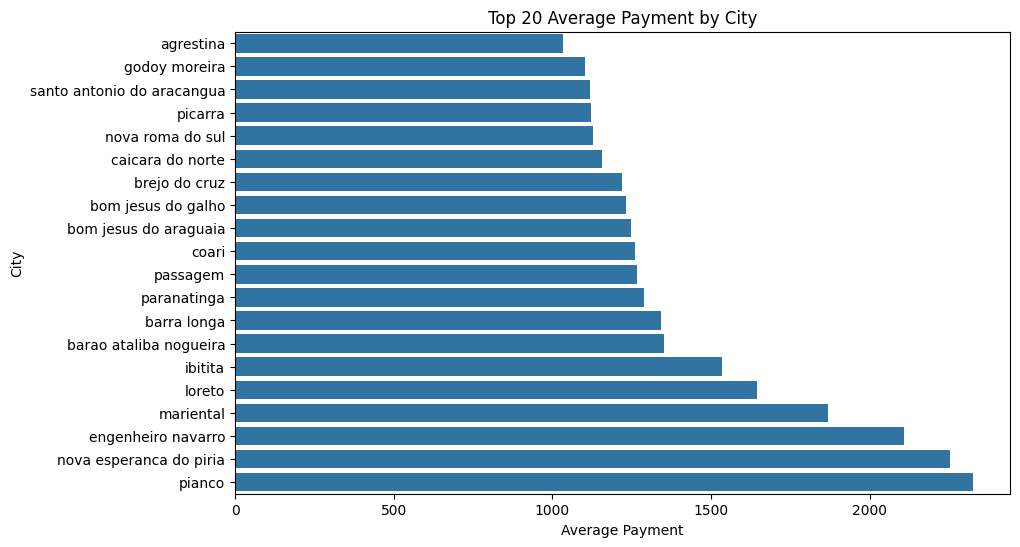

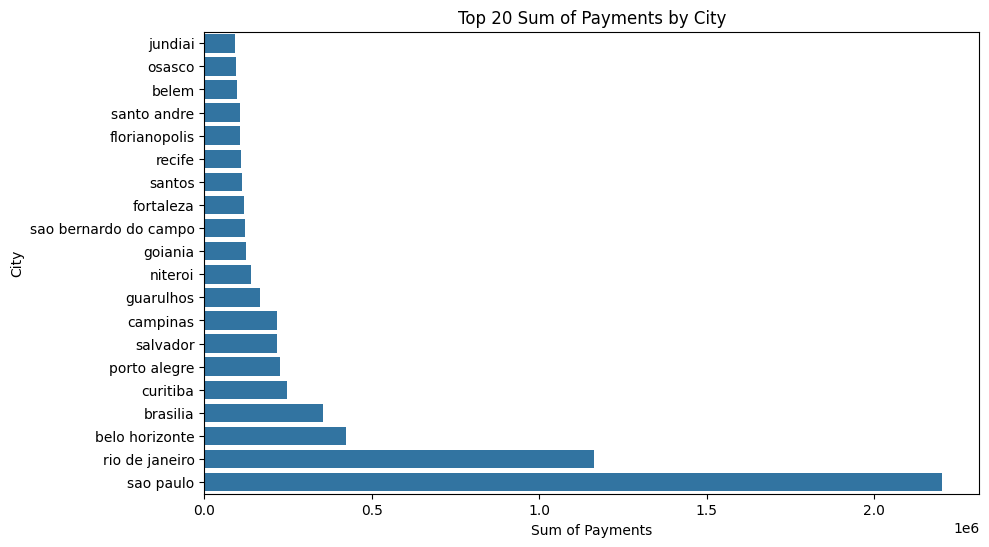

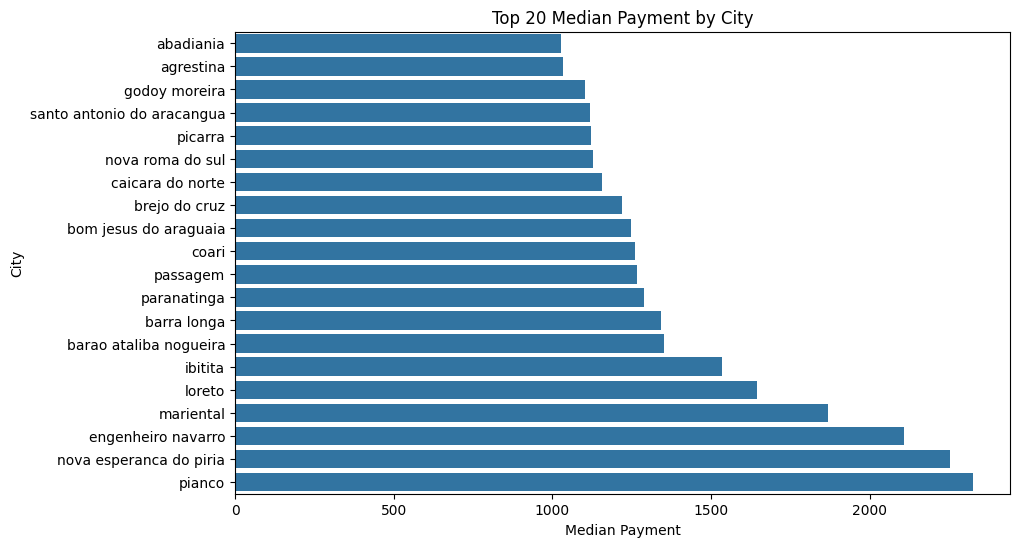

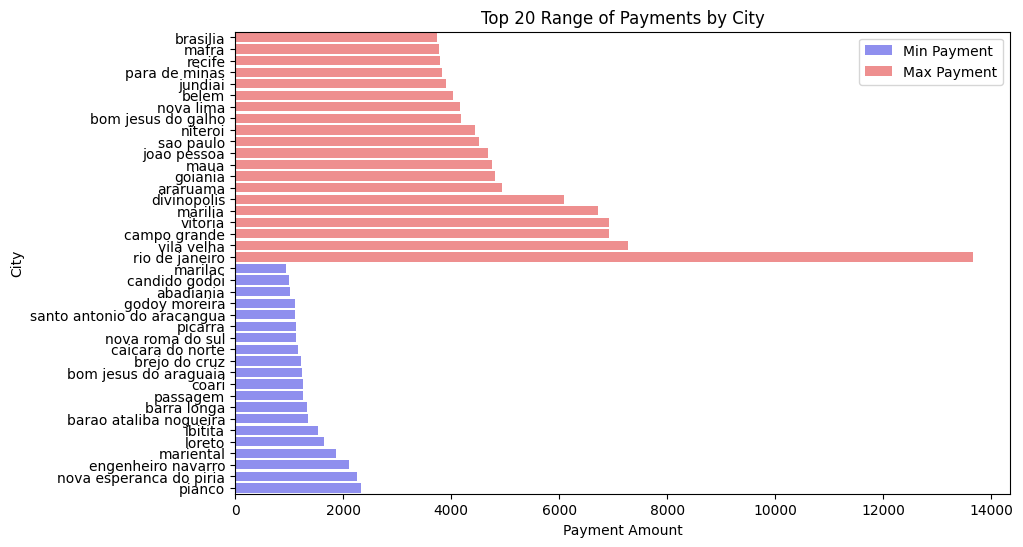

In [20]:
# Selecting only the top 20 cities in every category
top_20_avg_payment = df.sort_values(by="avg_payment", ascending=False).head(20)
top_20_sum_payment = df.sort_values(by="sum_payment", ascending=False).head(20)
top_20_median_payment = df.sort_values(by="median_payment", ascending=False).head(20)
top_20_min_payment = df.sort_values(by="min_payment", ascending=False).head(20)
top_20_max_payment = df.sort_values(by="max_payment", ascending=False).head(20)

# Visualizing average payment by city
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_payment", y="customer_city", data=top_20_avg_payment)
plt.title("Top 20 Average Payment by City")
plt.xlabel("Average Payment")
plt.ylabel("City")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Visualizing sum of payments by city
plt.figure(figsize=(10, 6))
sns.barplot(x="sum_payment", y="customer_city", data=top_20_sum_payment)
plt.title("Top 20 Sum of Payments by City")
plt.xlabel("Sum of Payments")
plt.ylabel("City")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Visualizing median payment by city
plt.figure(figsize=(10, 6))
sns.barplot(x="median_payment", y="customer_city", data=top_20_median_payment)
plt.title("Top 20 Median Payment by City")
plt.xlabel("Median Payment")
plt.ylabel("City")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

# Visualizing range of payments (min, max) by city
plt.figure(figsize=(10, 6))
sns.barplot(
    x="min_payment",
    y="customer_city",
    data=top_20_min_payment,
    color="blue",
    alpha=0.5,
    label="Min Payment",
)
sns.barplot(
    x="max_payment",
    y="customer_city",
    data=top_20_max_payment,
    color="red",
    alpha=0.5,
    label="Max Payment",
)
plt.title("Top 20 Range of Payments by City")
plt.xlabel("Payment Amount")
plt.ylabel("City")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.legend()
plt.show()

# Question from my girlfriend:
- which package is the weighest
- which order is the weighest

In [21]:
olist_products_dataset.agg(max_weight=("product_weight_g", "max"))

,product_weight_g
max_weight,40425.0


In [22]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
...,...,...,...,...,...,...,...,...,...
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [23]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
...,...,...,...,...,...,...,...
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79


In [24]:
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
...,...,...,...,...,...,...,...,...
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [25]:
product_category_name_translation_dict = dict(
    zip(
        product_category_name_translation["product_category_name"],
        product_category_name_translation["product_category_name_english"],
    )
)
olist_products_dataset["product_category_name_english"] = olist_products_dataset[
    "product_category_name"
].map(product_category_name_translation_dict)

In [26]:
orders = olist_orders_dataset.loc[:, ["order_id"]].merge(
    olist_order_items_dataset.loc[:, ["product_id", "order_id"]],
    on="order_id",
    how="left",
)
orders_products = orders.merge(
    olist_products_dataset.loc[:, ["product_id", "product_weight_g"]],
    on="product_id",
    how="left",
)
orders_products.groupby("order_id", as_index=False).agg(
    waga=("product_weight_g", "sum")
)

,order_id,waga
0,00010242fe8c5a6d1ba2dd792cb16214,650.0
...,...,...
99440,fffe41c64501cc87c801fd61db3f6244,600.0


In [27]:
olist_orders_product = olist_order_items_dataset.merge(
    olist_products_dataset.loc[:, ["product_id", "product_weight_g"]],
    on="product_id",
)

In [28]:
weight = olist_orders_dataset.merge(olist_orders_product, on="order_id", how="left")

In [29]:
weight_sum = weight.groupby("order_id", as_index=False).agg(
    weight=("product_weight_g", "sum")
)

In [30]:
# Find the index of the row with the maximum weight
max_weight_index = weight_sum["weight"].idxmax()

# Extract the ID corresponding to the maximum weight
id_with_max_weight = weight_sum.loc[max_weight_index, "order_id"]
max_weight = weight_sum.loc[max_weight_index, "weight"]

print("ID with the highest weight:", id_with_max_weight)
print("Highest weight:", max_weight)

ID with the highest weight: 9aec4e1ae90b23c7bf2d2b3bfafbd943
Highest weight: 184400.0


In [31]:
weight

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113424,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,150.0


In [32]:
weight[weight["order_id"] == "9aec4e1ae90b23c7bf2d2b3bfafbd943"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_weight_g
112918,9aec4e1ae90b23c7bf2d2b3bfafbd943,e7d6802668de6e74d0d6c56565bf2a24,delivered,2017-10-02 15:49:23,2017-10-02 16:05:19,2017-10-09 21:33:34,2017-10-11 17:11:54,2017-10-24 00:00:00,1.0,0db4869ac8a908414823d44d742f5ba3,7c67e1448b00f6e969d365cea6b010ab,2017-10-13 16:05:19,199.99,88.57,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112927,9aec4e1ae90b23c7bf2d2b3bfafbd943,e7d6802668de6e74d0d6c56565bf2a24,delivered,2017-10-02 15:49:23,2017-10-02 16:05:19,2017-10-09 21:33:34,2017-10-11 17:11:54,2017-10-24 00:00:00,10.0,47920da896bbd89e851429c78a7a7a8b,7c67e1448b00f6e969d365cea6b010ab,2017-10-13 16:05:19,179.99,0.08,19400.0


- What category is the most popular?
- City with the highest amount of orders.
- what category is the most pupular in each city?


In [33]:
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
...,...,...,...,...,...,...,...
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79


In [34]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0,bed_bath_table


In [35]:
olist_orders_product_category = olist_order_items_dataset.loc[
    :, ["product_id", "order_id"]
].merge(
    olist_products_dataset.loc[:, ["product_id", "product_category_name_english"]],
    on="product_id",
)
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
...,...,...,...,...,...,...,...
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79


In [36]:
best_categories = olist_orders_product_category.groupby(
    "product_category_name_english", as_index=False
).agg(categories_count=("product_category_name_english", "count"))
best_categories

,product_category_name_english,categories_count
0,agro_industry_and_commerce,212
...,...,...
70,watches_gifts,5991


/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1025228417.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


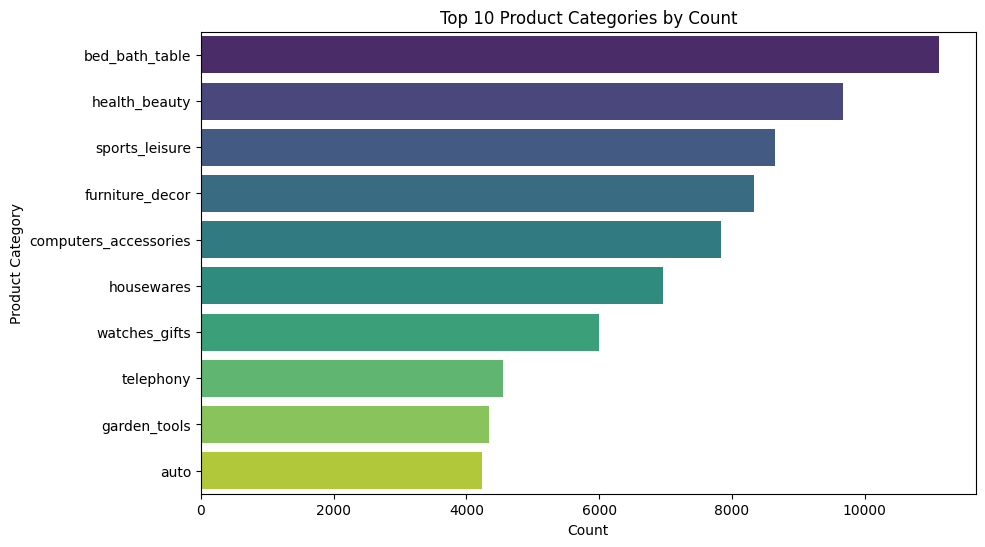

In [37]:
# Sort the categories based on count
best_categories_sorted = best_categories.sort_values(
    by="categories_count", ascending=False
)

# Select only the top 10 categories
top_10_categories = best_categories_sorted.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="categories_count",
    y="product_category_name_english",
    data=top_10_categories,
    palette="viridis",
)
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories by Count")
plt.show()

# City with the highest amount of orders.


/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/3172544997.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


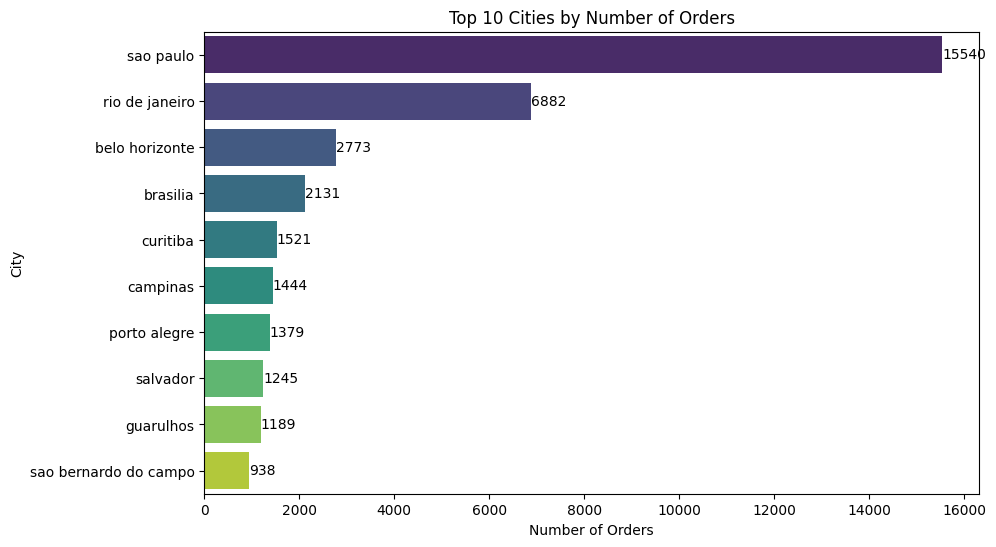

In [38]:
orders_city = olist_orders_dataset.loc[:, ["order_id", "customer_id"]].merge(
    olist_customers_dataset.loc[:, ["customer_id", "customer_city"]],
    on="customer_id",
    how="left",
)

orders_city.groupby("customer_city", as_index=False).agg(
    city_count=("customer_city", "count")
)
# Grouping by customer city and counting the number of orders
city_counts = orders_city.groupby("customer_city").size().reset_index(name="city_count")

# Sorting cities by the number of orders in descending order
city_counts_sorted = city_counts.sort_values(by="city_count", ascending=False)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="city_count",
    y="customer_city",
    data=city_counts_sorted.head(10),
    palette="viridis",
)

# Adding values on the bars
for index, value in enumerate(city_counts_sorted.head(10)["city_count"]):
    barplot.text(value, index, str(value), ha="left", va="center", color="black")

plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.title("Top 10 Cities by Number of Orders")
plt.show()

# What is top 3 category in those top 10 cities

In [39]:
orders_city

,order_id,customer_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo
...,...,...,...
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,lapa


In [40]:
orders_category_city = olist_orders_product_category.merge(
    orders_city, on="order_id", how="left"
)
top_cities_with_categories = orders_category_city.merge(
    city_counts_sorted.head(10).loc[:, ["customer_city"]],
    on="customer_city",
    how="inner",
)

top_cities_with_categories

,product_id,order_id,product_category_name_english,customer_id,customer_city
0,99a4788cb24856965c36a24e339b6058,0006ec9db01a64e59a68b2c340bf65a7,bed_bath_table,5d178120c29c61748ea95bac23cb8f25,rio de janeiro
...,...,...,...,...,...
39998,72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d,sports_leisure,29309aa813182aaddc9b259e31b870e6,sao paulo


In [41]:
# Group by city and product category, count occurrences, and reset index
city_category_counts = (
    top_cities_with_categories.groupby(
        ["customer_city", "product_category_name_english"]
    )
    .size()
    .reset_index(name="count")
)

# Sort by city and count in descending order
city_category_counts = city_category_counts.sort_values(
    by=["customer_city", "count"], ascending=[True, False]
)

# Group by city and get top 3 categories
top_3_categories = city_category_counts.groupby("customer_city").head(3)

print(top_3_categories)

      customer_city product_category_name_english  count
7    belo horizonte                bed_bath_table    351
..              ...                           ...    ...
584       sao paulo                sports_leisure   1397

[30 rows x 3 columns]


/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


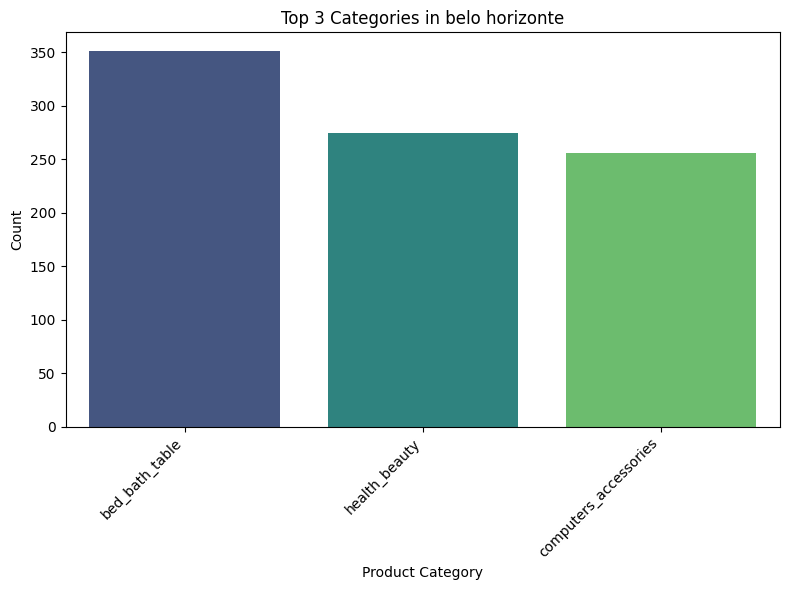

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


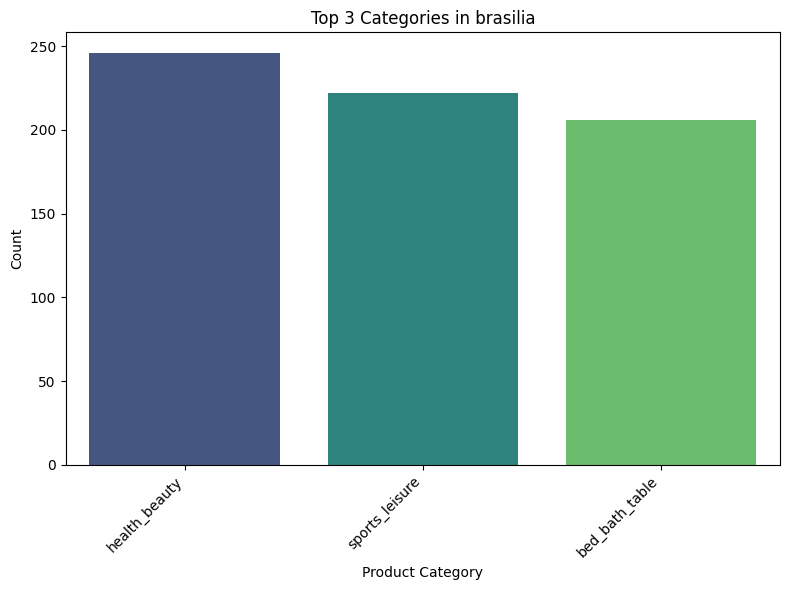

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


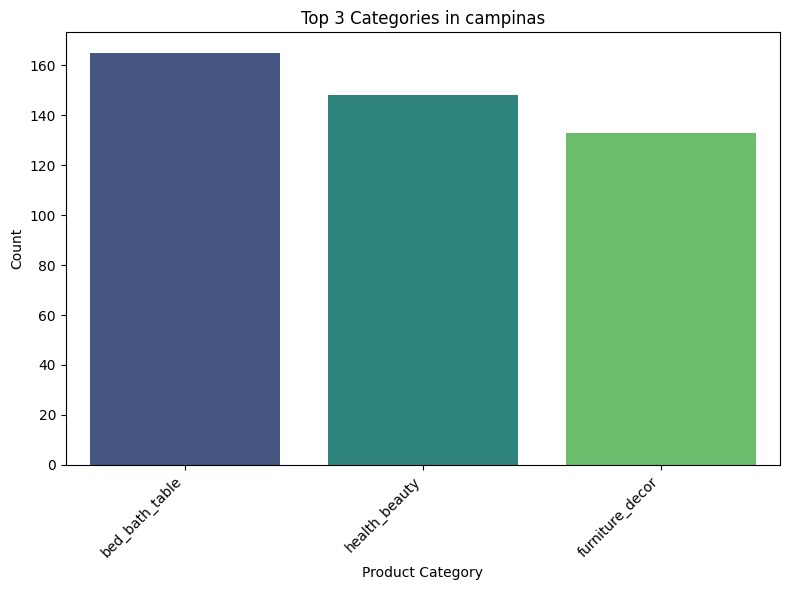

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


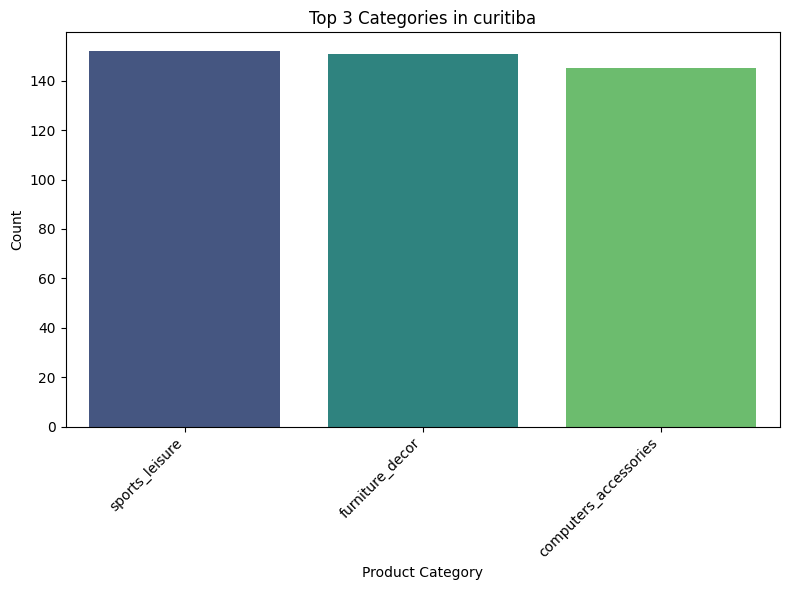

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


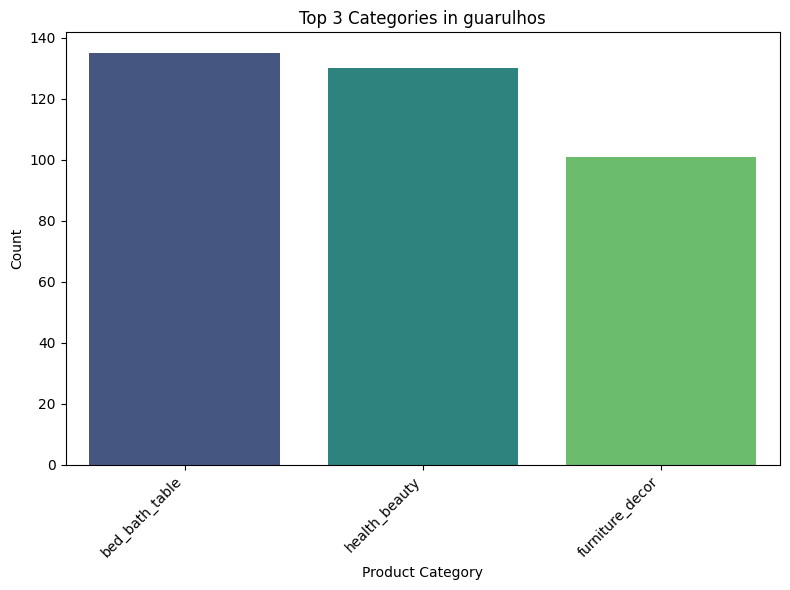

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


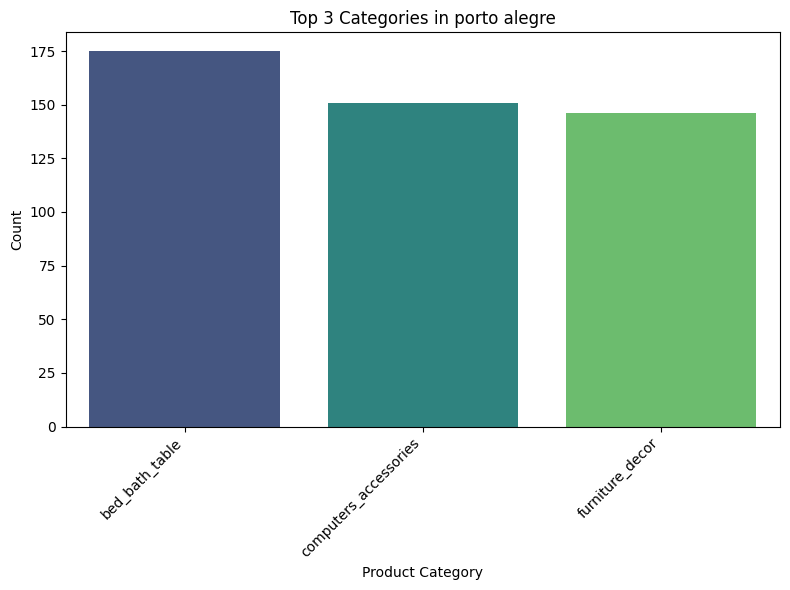

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


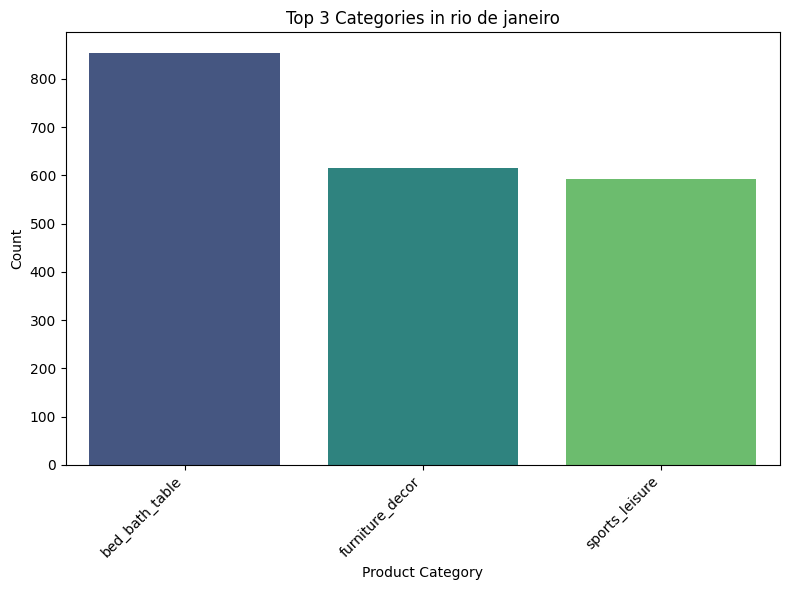

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


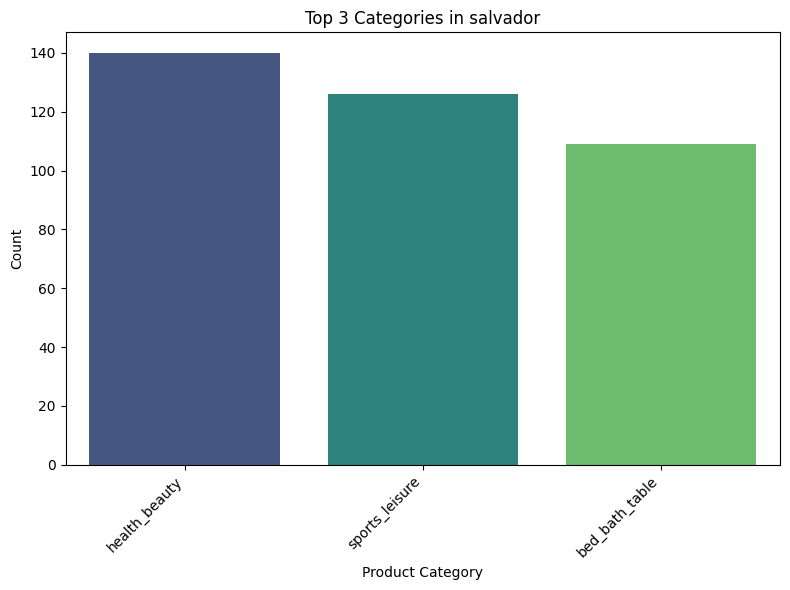

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


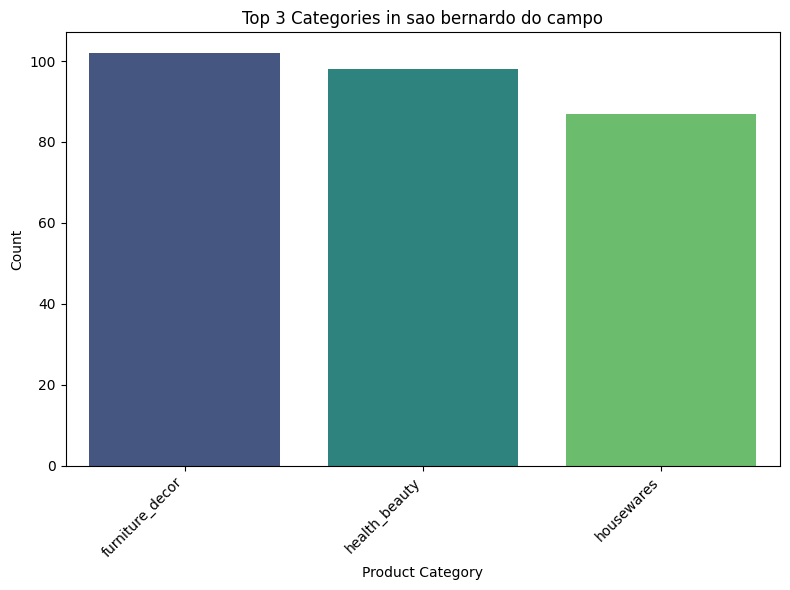

/var/folders/x6/rxsvgv111hdbbw87nfynfs840000gn/T/ipykernel_893/1212200320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category_name_english', y='count', data=city_df, palette='viridis')


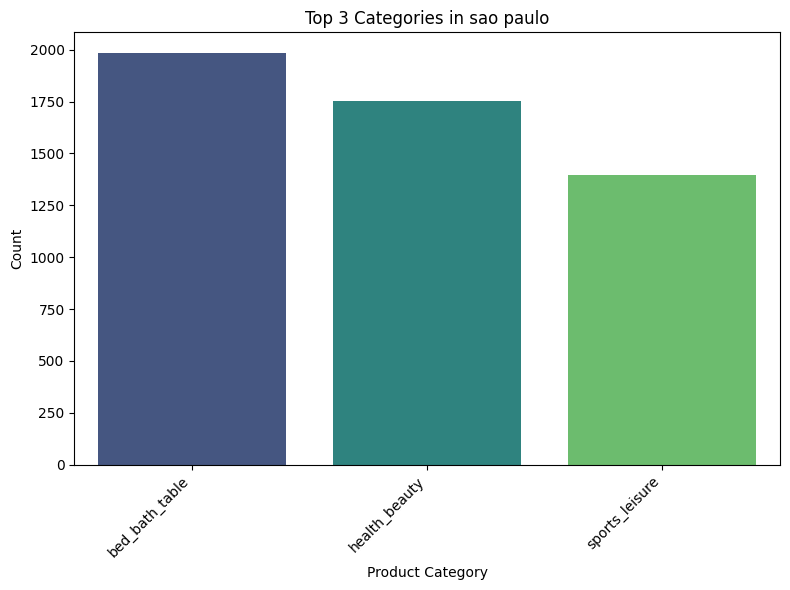

In [42]:
for city, city_df in top_3_categories.groupby("customer_city"):
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x="product_category_name_english", y="count", data=city_df, palette="viridis"
    )
    plt.title(f"Top 3 Categories in {city}")
    plt.xlabel("Product Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

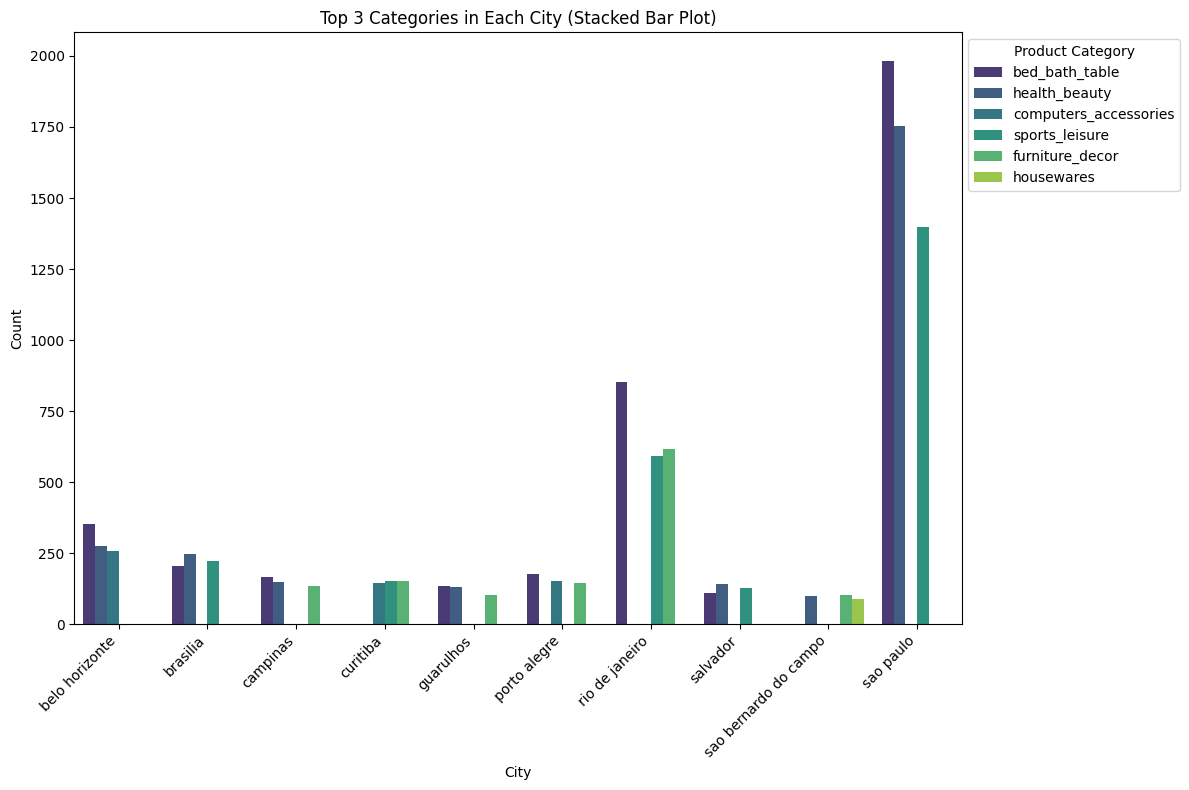

In [43]:
# Stacked Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x="customer_city",
    y="count",
    hue="product_category_name_english",
    data=top_3_categories,
    palette="viridis",
)
plt.title("Top 3 Categories in Each City (Stacked Bar Plot)")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Product Category", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()